In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import matplotlib.colors as colors

plt.rcParams.update(
    {
        "mathtext.fontset": "cm",
        "font.family": "STIXGeneral",
        "legend.fontsize": 16,  # this is the font size in legends
        "xtick.labelsize": 16,  # this and next are the font of ticks
        "ytick.labelsize": 16,
        "axes.titlesize": 16,
        "axes.labelsize": 20,  # this is the foflags.N of axes labels
        "savefig.format": "pdf",  # how figures should be saved
        "legend.edgecolor": "0.0",
        "legend.framealpha": 0.0,
        # "text.usetex": True,
    }
)

plasmamap = plt.get_cmap("plasma")
RdBumap = plt.get_cmap("RdBu")
virimap = plt.get_cmap("viridis")

## Figure 4A

In [12]:
data = np.load("fig4a_data.npz", allow_pickle=True)

Text(0, 0.5, 'Response in activity $\\langle a \\rangle$')

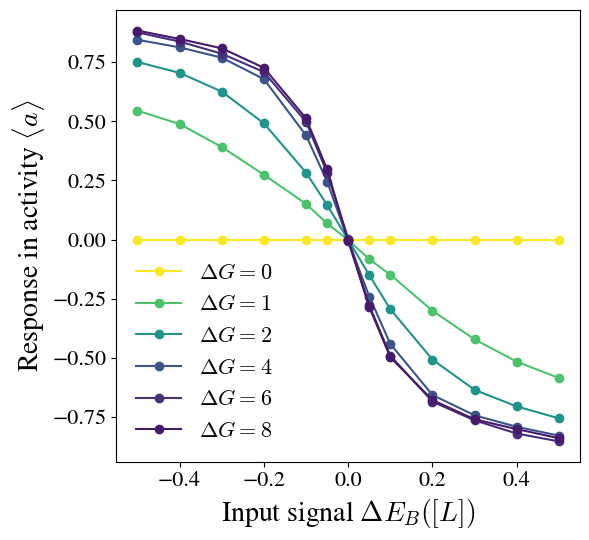

In [13]:
fig, ax = plt.subplots(figsize=(6, 5.5), tight_layout=True)

for _ in range(len(data["main_DeltaG"])):
    ax.plot(
        data["main_eb"],
        data["main_amplitude"][_, :, 0],
        "o-",
        color=virimap(np.exp(-data["main_DeltaG"][_] / 3)),
        label=r"$\Delta G = %.0f$" % data["main_DeltaG"][_],
    )


ax.legend(ncol=1, loc="lower left")

ax.set_xlabel(r"Input signal $\Delta E_B([L])$")
ax.set_ylabel(r"Response in activity $\langle a \rangle$")

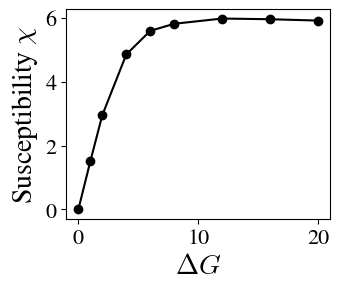

In [14]:
fig, ax = plt.subplots(figsize=(3.5, 3), tight_layout=True)
ax.plot(data["inset_DeltaG"], data["inset_suceptibility"], "o-", color="k")
ax.set_xlabel(r"$\Delta G$")
ax.set_ylabel(r"Susceptibility $\chi $")
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

## Figure 4B

In [64]:
data = np.load("fig4b_data.npz", allow_pickle=True)

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/var/folders/mq/p5kn27bn3j927psc4z_49npm0000gn/T/ipykernel_16661/1662750825.py:6: SyntaxWarning: invalid escape sequence '\e'
  label=f"$\epsilon={data["epsilon_list"][epsilon_id]:.2f}$",


Text(4.0, 0.15, 'increasing $J$')

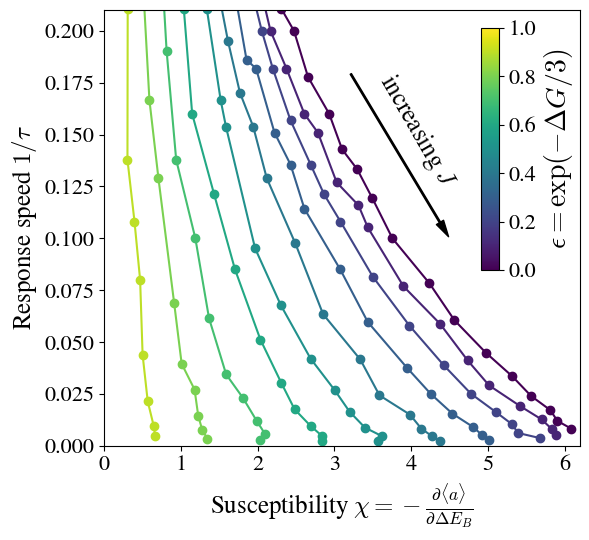

In [65]:
fig, ax = plt.subplots(figsize=(6, 5.5), tight_layout=True)
for epsilon_id in range(len(data["epsilon_list"])):
    ax.plot(
       data["amplitude_threshold"][:, epsilon_id],
       data["speed_threshold"][:, epsilon_id],
        label=f"$\epsilon={data["epsilon_list"][epsilon_id]:.2f}$",
        marker="o",
        color=virimap(data["epsilon_list"][epsilon_id]),
    )
ax.set_ylabel(r"Response speed $1/\tau$", fontsize=18)
ax.set_xlabel(
    r"Susceptibility $\chi = -\frac{\partial \langle a\rangle}{\partial \Delta E_B}$",
    fontsize=18,
)
# ax.legend(ncol=1)
ax.set_ylim(0, 0.21)
ax.set_xlim(0, 6.2)

# plot colormap
ax2 = fig.add_axes([0.81, 0.5, 0.03, 0.44])
plt.colorbar(
    plt.cm.ScalarMappable(
        norm=colors.Normalize(vmin=0, vmax=1),
        cmap=virimap,
    ),
    cax=ax2,
    label=r"$\epsilon=\exp(-\Delta G/3)$",
    orientation="vertical",
)

arrow_x = 4.5
arrow_y = 0.1
start_x = arrow_x - 1.3
start_y = arrow_y + 0.08

# Calculate the angle of the arrow in degrees
angle = np.degrees(np.arctan2(arrow_y - start_y, arrow_x - start_x))
angle = angle if angle >= 0 else angle + 360  # Ensure the angle is between 0 and 360

ax.annotate(
    "",
    xy=(arrow_x, arrow_y),
    xytext=(start_x, start_y),
    arrowprops=dict(facecolor="black", shrink=0.01, width=1, headwidth=6),
    fontsize=12,
    ha="center",
    rotation=int(angle),  # Rotate the text to be parallel to the arrow
    rotation_mode="anchor",  # Rotate around the anchor point
)
ax.text(
    4.0,
    0.15,
    r"increasing $J$",
    fontsize=18,
    rotation=-60,
    rotation_mode="anchor",
    ha="center",
)

## Figure 4C

In [66]:
data["epsilon_list"].shape, data["J_list"].shape, data["amplitude_threshold"].shape

((10,), (16,), (16, 10))

In [67]:
# find  element in J_list that is closest to 0.5
J_id = np.argmin(np.abs(data["J_list"] - 0.5))

/var/folders/mq/p5kn27bn3j927psc4z_49npm0000gn/T/ipykernel_16661/3806449450.py:3: RuntimeWarning: divide by zero encountered in log
  DeltaG_list = -3 * np.log(data["epsilon_list"])


(-1.0, 1.0)

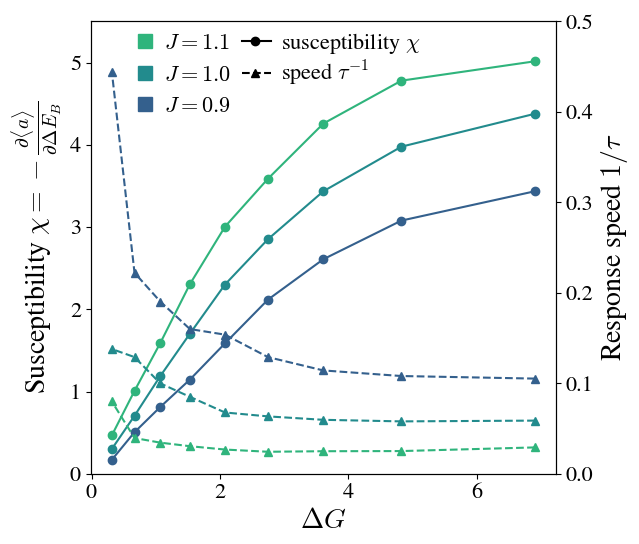

In [68]:
fig, ax = plt.subplots(figsize=(6.5, 5.5), tight_layout=True)
ax2 = ax.twinx()
DeltaG_list = -3 * np.log(data["epsilon_list"])
J_plot = [0.9, 1.0, 1.1]
for J in J_plot:
    J_id = np.argmin(np.abs(data["J_list"] - J))
    ax.plot(
        DeltaG_list,
        data["amplitude_threshold"][J_id],
        "o-",
        color=virimap(
            (J - data["J_list"].min()) / (data["J_list"].max() - data["J_list"].min())
        ),
    )
    ax2.plot(
        DeltaG_list,
        data["speed_threshold"][J_id],
        "--^",
        color=virimap(
            (J - data["J_list"].min()) / (data["J_list"].max() - data["J_list"].min())
        ),
    )

ax.set_xlabel(r"$\Delta G$")
ax.set_ylabel(
    r"Susceptibility $\chi = -\frac{\partial \langle a\rangle}{\partial \Delta E_B}$"
)
ax2.set_ylabel(r"Response speed $1/\tau$")
ax.set_ylim(0, 5.5)
ax2.set_ylim(0, 0.5)

#
# add color legends for J values
ax3 = fig.add_axes([0.18, 0.78, 0.4, 0.2])
ax3.axis("off")

for _ in range(len(J_plot)):
    # plot boxes for each J
    ax3.plot(
        [-0.75],
        [_ * 2],
        "s",
        color=virimap(
            (J_plot[_] - data["J_list"].min())
            / (data["J_list"].max() - data["J_list"].min())
        ),
        markersize=10,
    )
    ax3.text(-0.6, _ * 2 - 0.5, f"$J={J_plot[_]}$", fontsize=16)
ax3.plot(0.1, 4, "o-", color="k", markersize=6)
ax3.plot([0, 0.22], [4, 4], "-", color="k")
ax3.text(0.3, 1.5, r"speed $\tau^{-1}$", fontsize=16)
ax3.plot(0.1, 2, "^-", color="k", markersize=6)
ax3.plot([0, 0.22], [2, 2], "--", color="k")
ax3.text(0.3, 3.5, r"susceptibility $\chi$", fontsize=16)

ax3.set_ylim(-1, 6)
ax3.set_xlim(-1, 1)